In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [69]:
forest = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest.csv')
forest_area = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest_area.csv')
brazil_loss = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/brazil_loss.csv')
soybean_use = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/soybean_use.csv')
vegetable_oil = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/vegetable_oil.csv')

In [3]:
forest.head()

,entity,code,year,net_forest_conversion
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0
2,Algeria,DZA,2010,7600.0
3,Algeria,DZA,2015,-1400.0
4,Argentina,ARG,1990,-182600.0


In [4]:
forest.isna().sum()

entity                   0
code                     8
year                     0
net_forest_conversion    0
dtype: int64

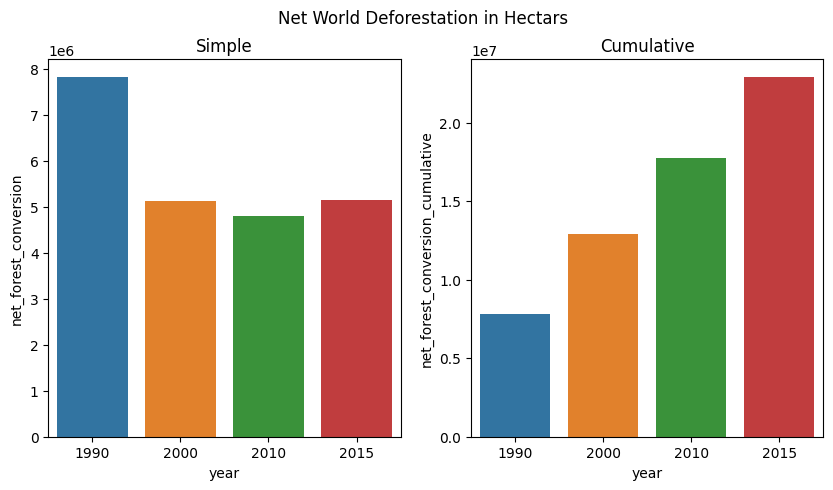

In [5]:
forest_year = forest[forest.entity=='World'].copy()
forest_year.net_forest_conversion = -forest_year.net_forest_conversion
forest_year['net_forest_conversion_cumulative'] = forest_year.net_forest_conversion.cumsum()

fig, ax = plt.subplots(1,2,figsize=(10,5),dpi=100)
sns.barplot(data=forest_year, x='year', y='net_forest_conversion', ax=ax[0])
sns.barplot(data=forest_year, x='year', y='net_forest_conversion_cumulative', ax=ax[1])
ax[0].set_title('Simple')
ax[1].set_title('Cumulative')
fig.suptitle('Net World Deforestation in Hectars')
plt.show()

In [6]:
forest_merged = pd.merge(left=forest, right=forest_area, on=['entity', 'code', 'year'])
most_forested_countries = forest_merged[forest_merged.year==1990].sort_values('forest_area', ascending=False)['entity'][:10].tolist()
most_forested_countries.append('Russia')
forest_merged.loc[~forest_merged.entity.isin(most_forested_countries), 'entity'] = 'Other'
forest_merged = forest_merged.groupby(['entity','year'], as_index=False).sum()
forest_merged.net_forest_conversion = -forest_merged.net_forest_conversion
forest_merged = forest_merged.sort_values(['entity','year'], ascending=True)
forest_merged['net_forest_conversion_cumulative'] = forest_merged.groupby(['entity', 'year']).sum() \
                                                    .groupby(level=0).cumsum()['net_forest_conversion'].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


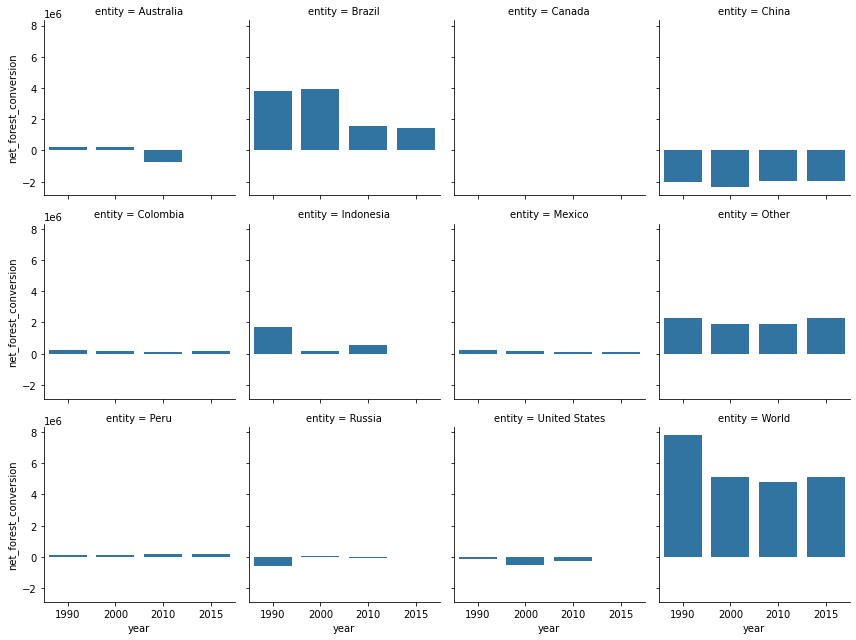

In [7]:
g = sns.FacetGrid(forest_merged, col='entity', col_wrap=4, height=3, aspect=1, sharey=True, sharex=True)
g.map(sns.barplot, 'year','net_forest_conversion')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


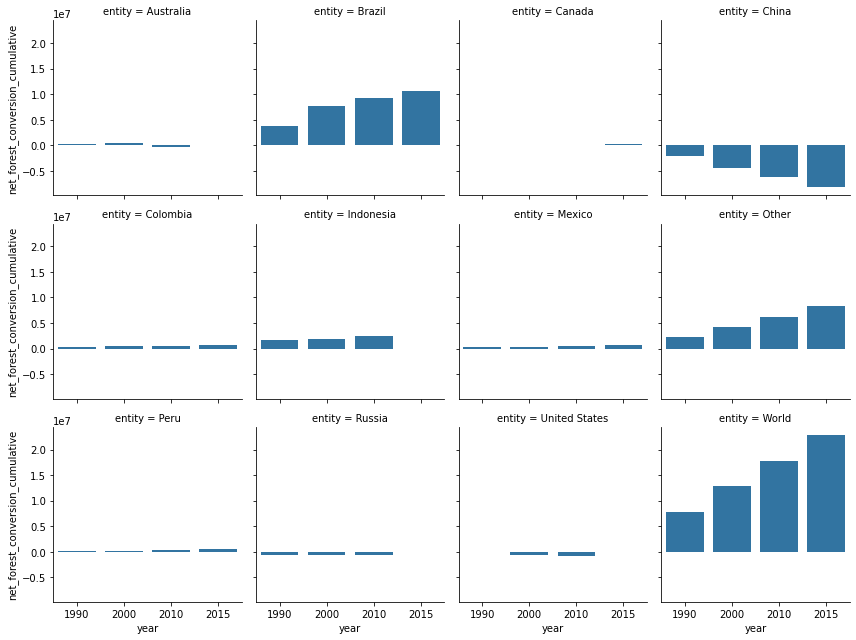

In [8]:
g = sns.FacetGrid(forest_merged, col='entity', col_wrap=4, height=3, aspect=1, sharey=True, sharex=True)
g.map(sns.barplot, 'year','net_forest_conversion_cumulative')
plt.show()

In [9]:
### Vzato z forest_area
not_country = ['Americas','Asia','Central America', 'Central Asia', 'EU-27', 'EU-28', 'Eastern Africa',
       'Eastern Asia', 'Eastern Europe', 'Europe', 'Land Locked Developing Countries',
       'Least Developed Countries','Low Income Food Deficit Countries','Middle Africa',
       'Net Food Importing Developing Countries','Northern Africa', 'Northern America', 'Northern Europe',
       'Small Island Developing States','South America',
       'Southeastern Asia',
       'Southern Africa', 'Southern Asia', 'Southern Europe', 'Western Africa', 'Western Asia',
       'Western Europe', 'Western Sahara', 'World']

In [10]:
forest_area.head()

,entity,code,year,forest_area
0,Afghanistan,AFG,1990,0.028525
1,Afghanistan,AFG,1991,0.028578
2,Afghanistan,AFG,1992,0.028631
3,Afghanistan,AFG,1993,0.028684
4,Afghanistan,AFG,1994,0.028738


In [11]:
forest_area_top_countries = forest_area.loc[~forest_area.entity.isin(not_country)].copy()
forest_area_top_countries.loc[~forest_area_top_countries.entity.isin(most_forested_countries), 'entity'] = 'Other'
forest_area_top_countries = forest_area_top_countries.groupby(['entity','year'], as_index=False).sum()

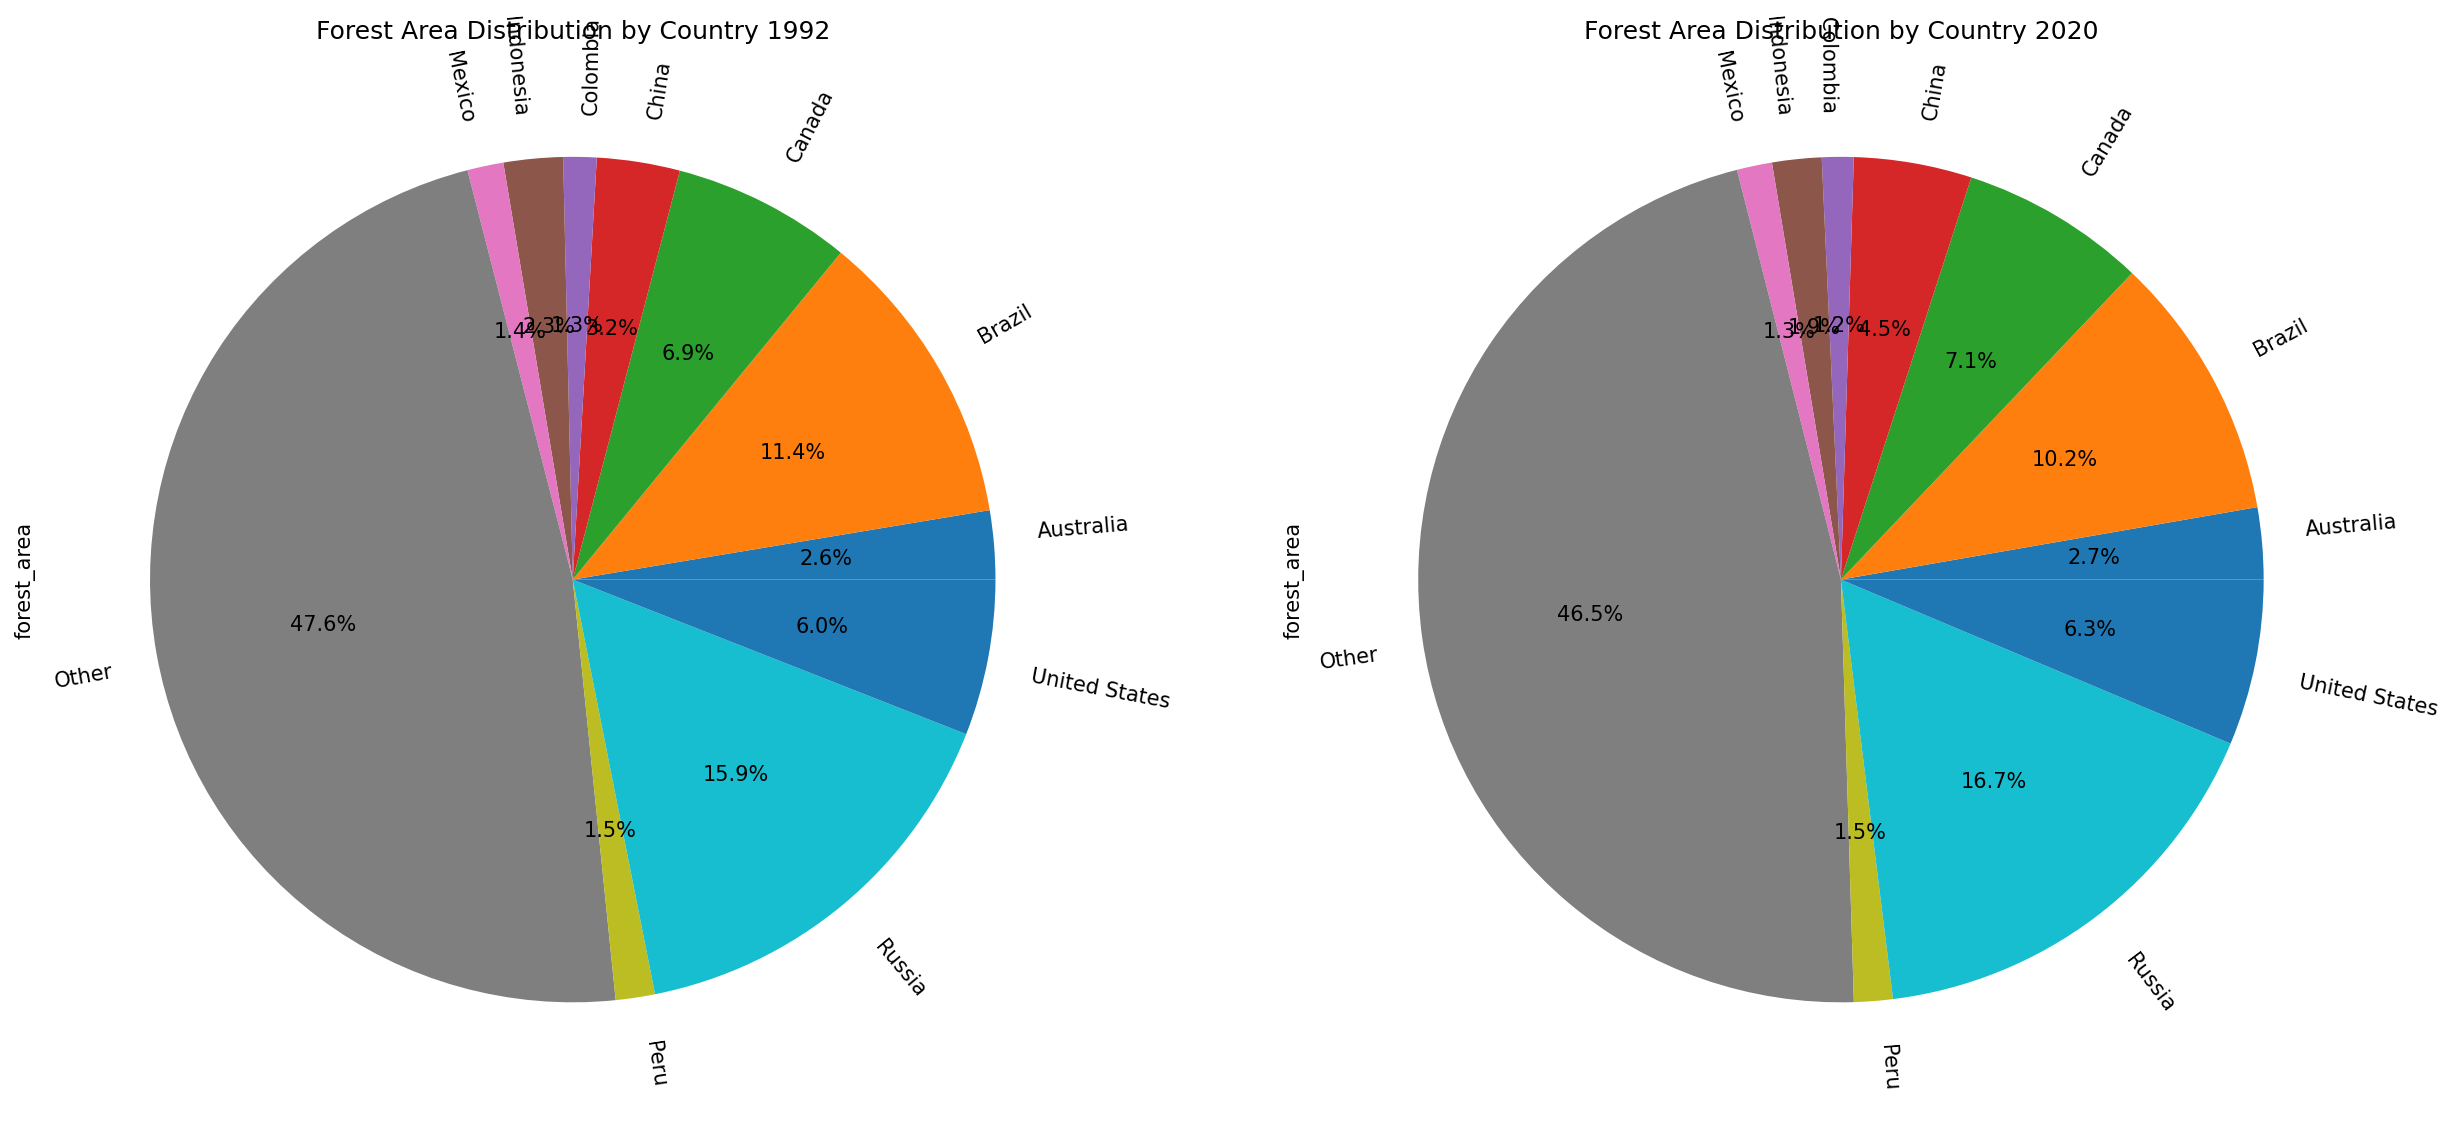

In [12]:
labels1=forest_area_top_countries.loc[forest_area_top_countries.year==1992,'entity']
labels2=forest_area_top_countries.loc[forest_area_top_countries.year==2020,'entity']

fig,ax = plt.subplots(1,2,figsize=(20,15), dpi=150)

forest_area_top_countries.loc[forest_area_top_countries.year==1992,['entity','forest_area']] \
.plot.pie(y='forest_area',labels=labels1,autopct="%.1f%%", ax=ax[0], legend=False, rotatelabels=True)

forest_area_top_countries.loc[forest_area_top_countries.year==2020,['entity','forest_area']] \
.plot.pie(y='forest_area',labels=labels2,autopct="%.1f%%", ax=ax[1], legend=False, rotatelabels=True)

ax[0].set_title('Forest Area Distribution by Country 1992')
ax[1].set_title('Forest Area Distribution by Country 2020')
plt.show()

In [13]:
brazil_loss.head()

,entity,code,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,BRA,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,BRA,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,BRA,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,BRA,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,BRA,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000


In [14]:
brazil_loss_melted = brazil_loss.melt(id_vars=['entity','code','year'])

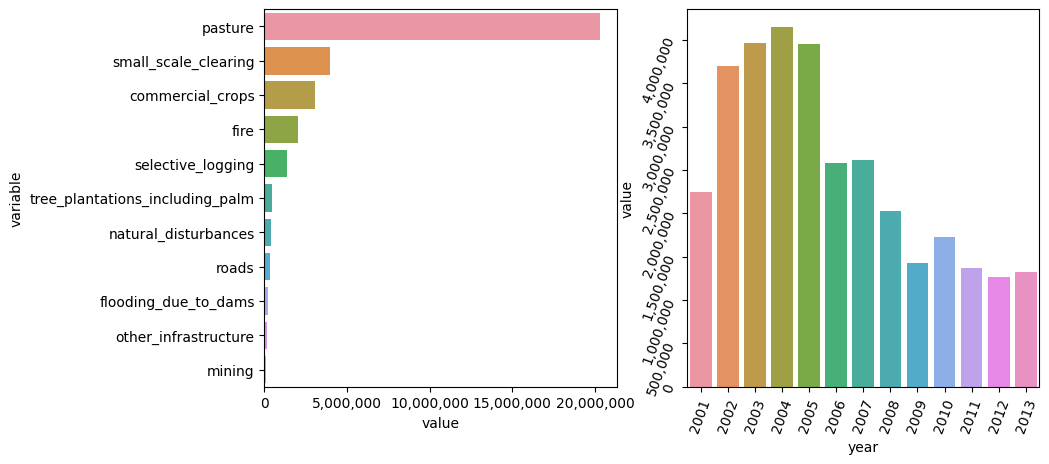

In [31]:
brazil_cause = brazil_loss_melted.groupby('variable', as_index=False).sum().sort_values('value', ascending=False)
brazil_year = brazil_loss_melted.groupby('year', as_index=False).sum().sort_values('year', ascending=True)

fig, ax = plt.subplots(1,2, figsize=(10,5), dpi=100)
sns.barplot(data=brazil_cause, y='variable', x='value',orient='h', ax=ax[0])
sns.barplot(data=brazil_year, x='year', y='value',orient='v', ax=ax[1])
ax[0].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax[1].tick_params(rotation=70)
plt.show()

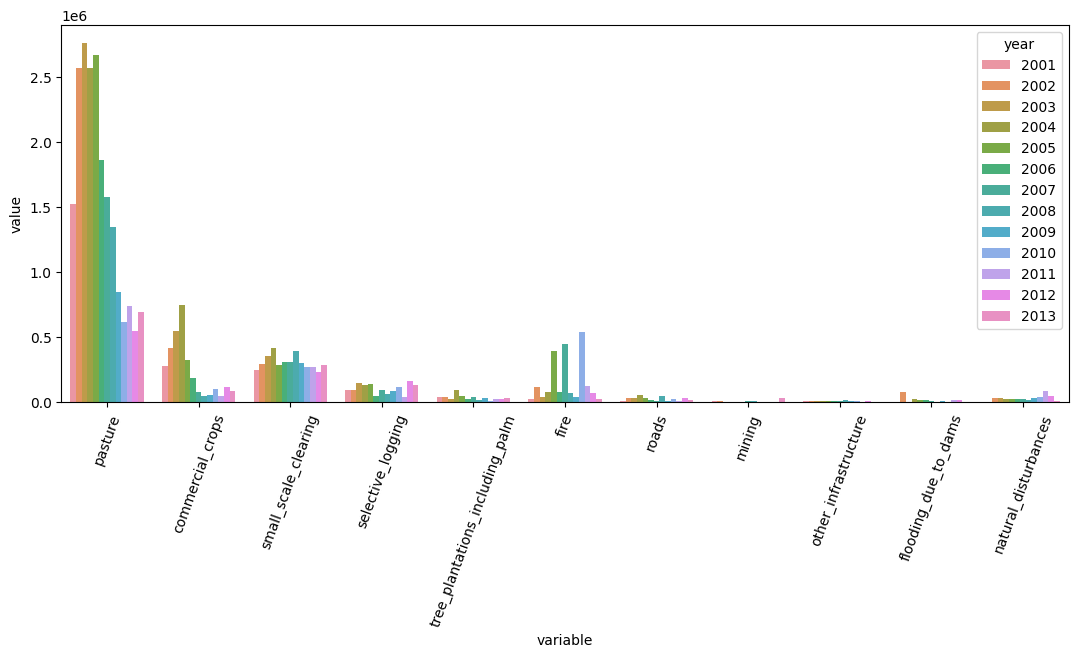

In [16]:
brazil_cause_year = brazil_loss_melted.groupby(['year','variable'], as_index=False).sum().sort_values(['year','value'], ascending=[True,False])
plt.figure(figsize=(13,5), dpi=100)
ax = sns.barplot(data=brazil_cause_year, x='variable', y='value', hue='year', orient='v')
ax.tick_params(rotation=70,axis='x')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


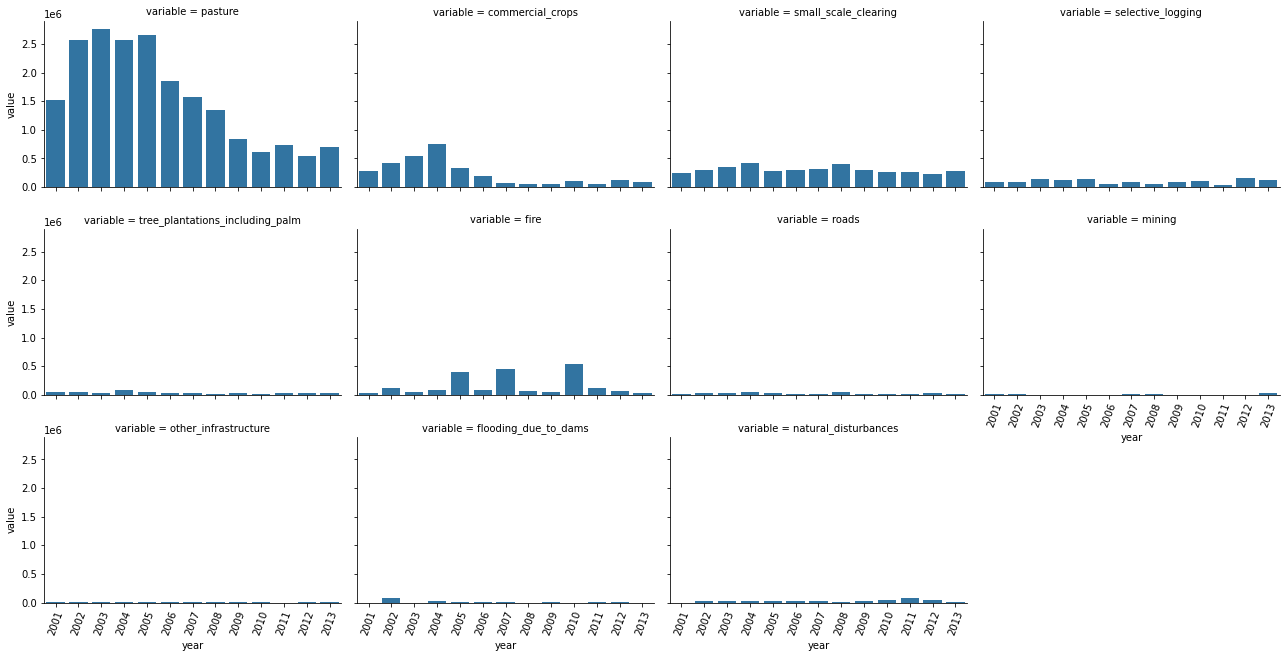

In [17]:
g = sns.FacetGrid(brazil_cause_year, col='variable', col_wrap=4, height=3, aspect=1.5, sharey=True, sharex=True)
g.map(sns.barplot, 'year','value')
g.set_xticklabels(rotation=70)
plt.show()

In [35]:
brazil_loss

,entity,code,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,BRA,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,BRA,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,BRA,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,BRA,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,BRA,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000
5,Brazil,BRA,2006,188000,17000,26000,1861000,52000,79000,0,9000,17000,26000,306000
6,Brazil,BRA,2007,79000,9000,22000,1577000,96000,446000,9000,13000,13000,39000,310000
7,Brazil,BRA,2008,52000,0,17000,1345000,61000,70000,9000,17000,48000,17000,397000
8,Brazil,BRA,2009,57000,9000,31000,847000,87000,44000,0,9000,9000,35000,301000
9,Brazil,BRA,2010,100000,0,44000,616000,114000,537000,4000,9000,22000,9000,271000


<Figure size 1200x800 with 0 Axes>

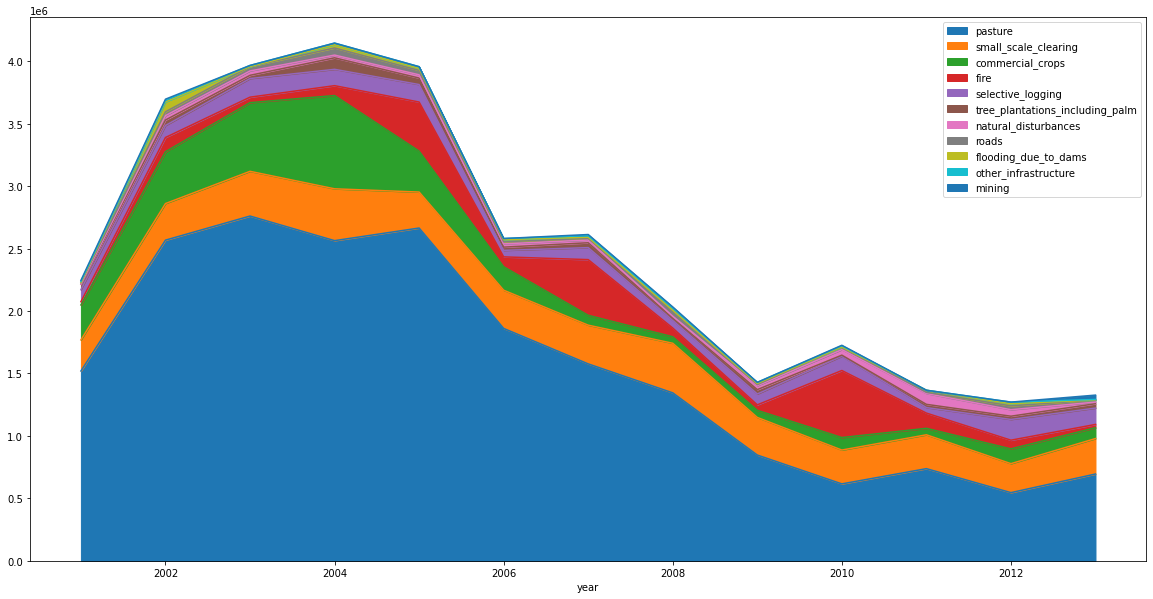

In [56]:
s = brazil_loss.drop(['code','entity'], axis=1).sum().sort_values(ascending=False).index

plt.figure(dpi=200)
brazil_loss[s].plot.area(x='year',figsize=(20,10))
plt.show()

In [49]:
brazil_loss.columns

Index(['entity', 'code', 'year', 'commercial_crops', 'flooding_due_to_dams',
       'natural_disturbances', 'pasture', 'selective_logging', 'fire',
       'mining', 'other_infrastructure', 'roads',
       'tree_plantations_including_palm', 'small_scale_clearing'],
      dtype='object')

In [19]:
forest_area.head()

,entity,code,year,forest_area
0,Afghanistan,AFG,1990,0.028525
1,Afghanistan,AFG,1991,0.028578
2,Afghanistan,AFG,1992,0.028631
3,Afghanistan,AFG,1993,0.028684
4,Afghanistan,AFG,1994,0.028738


In [20]:
soybean_use.isna().sum()

entity            0
code           1734
year              0
human_food      215
animal_feed    5538
processed      3644
dtype: int64

In [21]:
soybean_use.head(10)

,entity,code,year,human_food,animal_feed,processed
0,Africa,NaN,1961,33000.0,6000.0,14000.0
1,Africa,NaN,1962,43000.0,7000.0,17000.0
2,Africa,NaN,1963,31000.0,7000.0,5000.0
3,Africa,NaN,1964,43000.0,6000.0,14000.0
4,Africa,NaN,1965,34000.0,6000.0,12000.0
5,Africa,NaN,1966,41000.0,6000.0,2000.0
6,Africa,NaN,1967,47000.0,6000.0,4000.0
7,Africa,NaN,1968,50000.0,7000.0,3000.0
8,Africa,NaN,1969,52000.0,6000.0,6000.0
9,Africa,NaN,1970,52000.0,6000.0,8000.0


In [22]:
soybean_use.isna().sum()

entity            0
code           1734
year              0
human_food      215
animal_feed    5538
processed      3644
dtype: int64

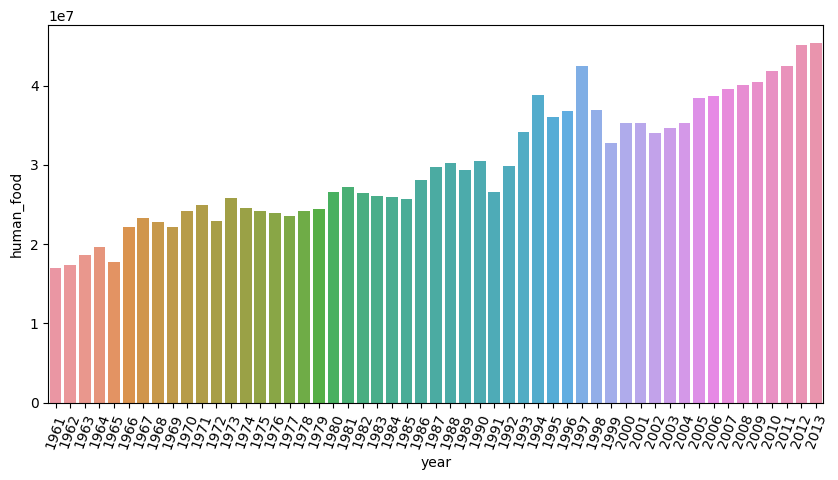

In [23]:
soybean_use_year = soybean_use.groupby('year', as_index=False).sum()

plt.figure(figsize=(10,5), dpi=100)
ax = sns.barplot(data=soybean_use_year, x='year', y='human_food')
ax.tick_params(rotation=70,axis='x')
plt.show()

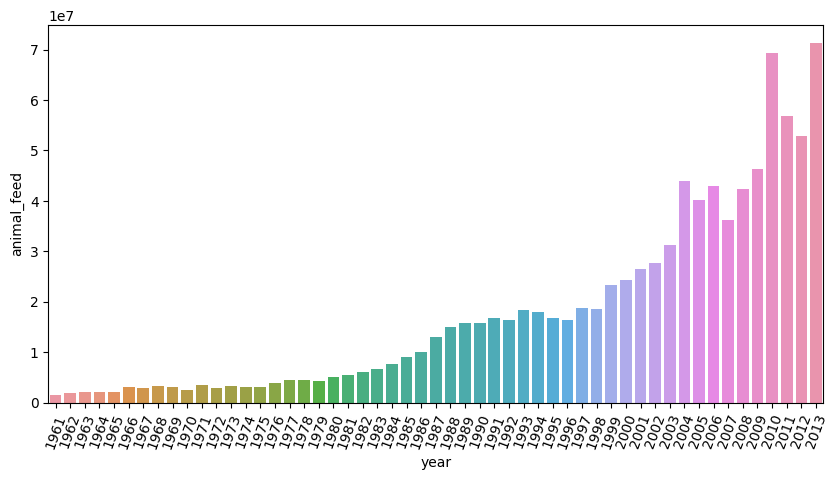

In [24]:
soybean_use_year = soybean_use.groupby('year', as_index=False).sum()

plt.figure(figsize=(10,5), dpi=100)
ax = sns.barplot(data=soybean_use_year, x='year', y='animal_feed')
ax.tick_params(rotation=70,axis='x')
plt.show()

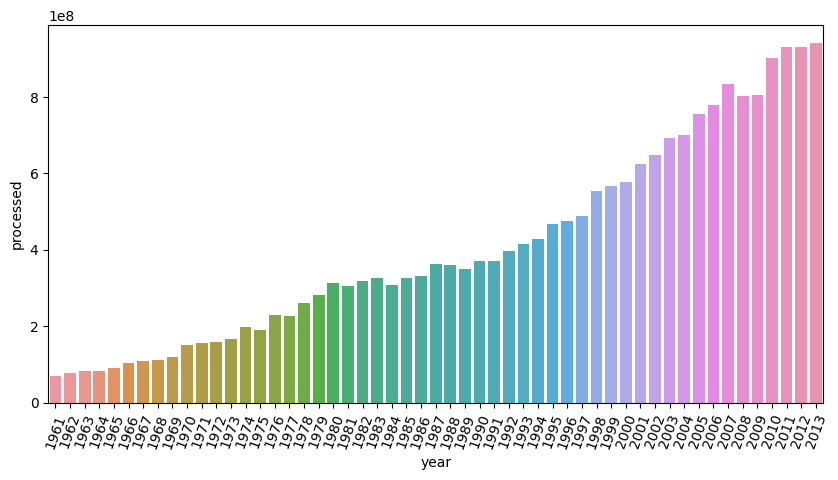

In [25]:
plt.figure(figsize=(10,5), dpi=100)
ax = sns.barplot(data=soybean_use_year, x='year', y='processed')
ax.tick_params(rotation=70,axis='x')
plt.show()

In [91]:
soybean_use_top = soybean_use[(soybean_use.code.isna()==False) & (soybean_use.code.str.len()==3)].copy()
soybean_use_top.loc[~soybean_use.entity.isin(most_forested_countries),'entity'] = 'Other'
soybean_use_top = soybean_use_top.groupby(['entity','year'], as_index=False).sum()
# soybean_use_top = soybean_use_top.melt(id_vars=['entity', 'year'])

soybean_use_top.head()

,entity,year,human_food,animal_feed,processed
0,Australia,1961,0.0,0.0,0.0
1,Australia,1962,0.0,0.0,0.0
2,Australia,1963,0.0,0.0,1000.0
3,Australia,1964,0.0,1000.0,2000.0
4,Australia,1965,0.0,2000.0,5000.0


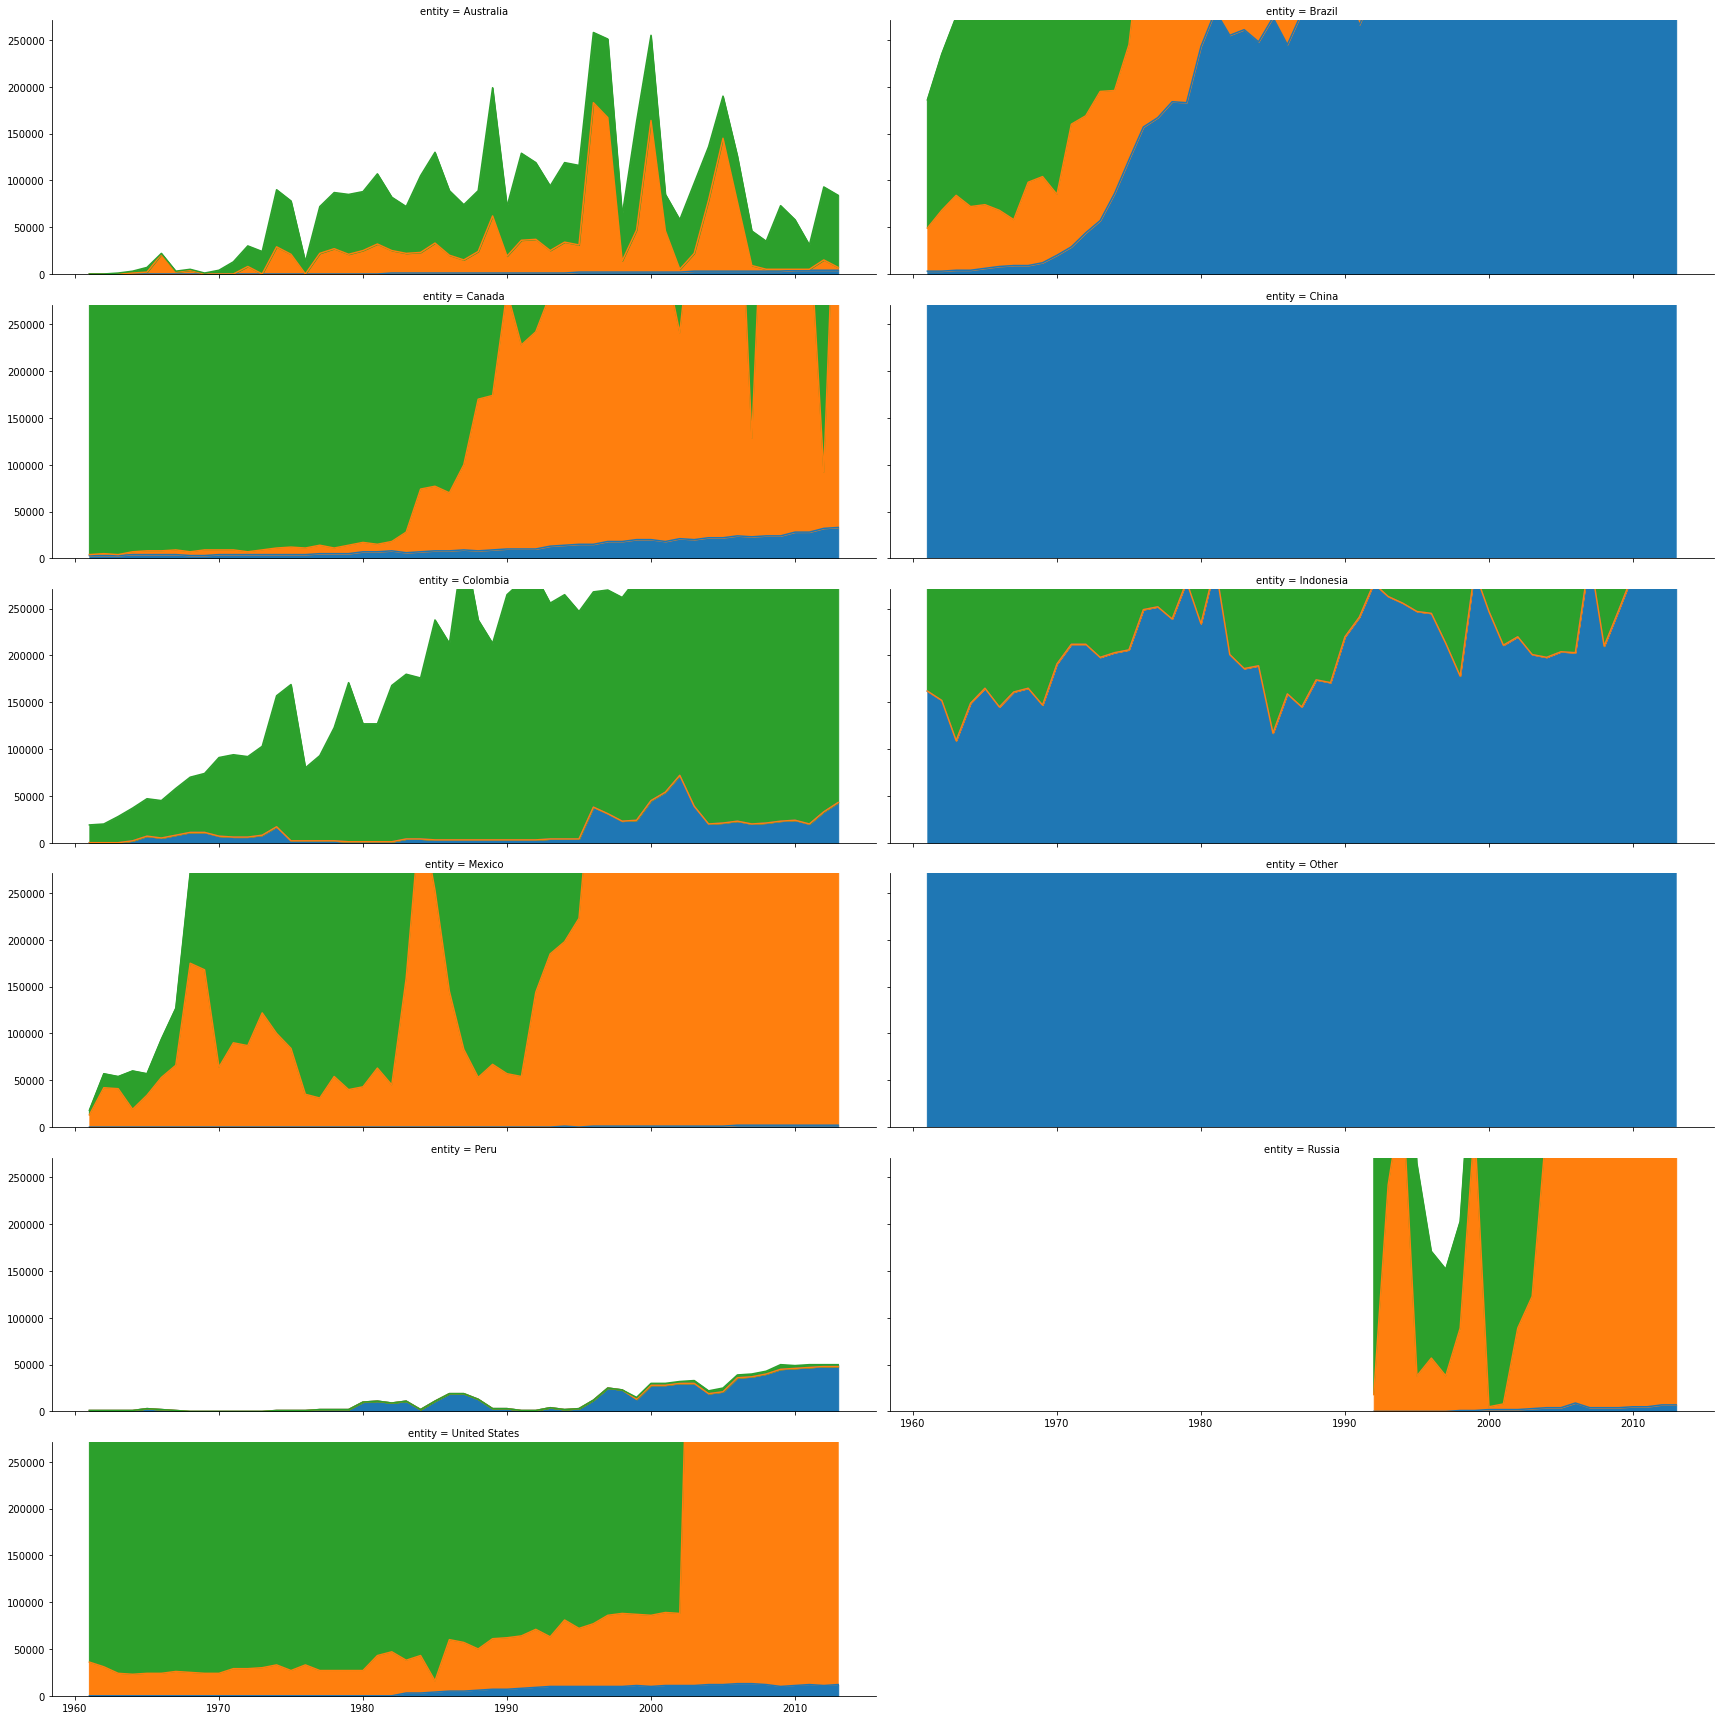

In [131]:
def plot_area(data,color):
  data.plot.area(x='year', ax=plt.gca())

g = sns.FacetGrid(soybean_use_top, col='entity', col_wrap=2, height=4, aspect=3)
g.map_dataframe(plot_area)

In [119]:
df = pd.DataFrame({
        "Home": [76, 64, 38, 78, 63,    45, 32, 46, 13, 40],
        "Away": [55, 67, 70, 56, 59,    69, 72, 24, 45, 21],
        "Team": ["T1"] * 5 +            ["T2"] * 5,
        "Year": ["1991", "1992", "1993", "1994", "1995"] * 2})

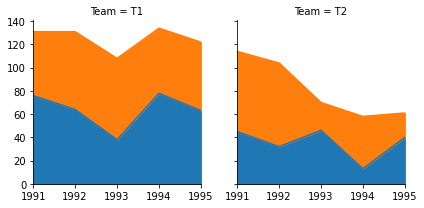

In [121]:
def plot_area(data, color):
    data.index = pd.to_datetime(data["Year"])
    data[["Home", "Away"]].plot(kind="area", ax=plt.gca())

g = sns.FacetGrid(df, col="Team")
g.map_dataframe(plot_area)